# multi_modal_distribution

- 条件付き確率
- 同時確率・加法定理・乗法定理
- 独立・従属・条件付き独立
- 確率分布の性質を利用した計算

In [11]:
# データ読み込み
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(
    '../data/range_sensor/sensor_data_600.txt',
    delimiter=' ',
    header=None,
    names=('date', 'time', 'ir', 'lidar'))
print(data)

           date    time  ir  lidar
0      20180202  110001  28    627
1      20180202  110004  17    626
2      20180202  110007  14    627
3      20180202  110010  31    622
4      20180202  110013  24    630
5      20180202  110016  20    626
6      20180202  110019  18    624
7      20180202  110022  27    629
8      20180202  110025  20    628
9      20180202  110028  32    621
10     20180202  110032  21    624
11     20180202  110035  10    618
12     20180202  110037  13    623
13     20180202  110041   7    621
14     20180202  110044  36    621
15     20180202  110047  38    624
16     20180202  110050  22    627
17     20180202  110053  23    629
18     20180202  110056  24    625
19     20180202  110059  30    627
20     20180202  110101  18    626
21     20180202  110105  23    628
22     20180202  110108  14    622
23     20180202  110110  32    625
24     20180202  110114  24    623
25     20180202  110117  30    625
26     20180202  110119  20    619
27     20180202  110

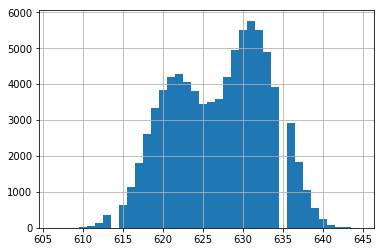

In [4]:
# ヒストグラム
data['lidar'].hist(bins=max(data['lidar'])-min(data['lidar']), align='left')
plt.show()

- 山二ツ
- 正規分布が2つ隣り合ってる感じ

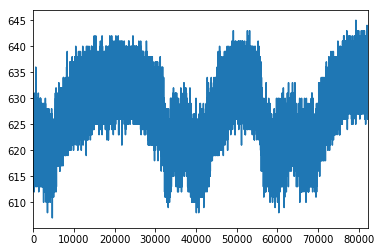

In [6]:
# 時系列でみてみる
data.lidar.plot()
plt.show()

なんか時間経過で上下している  
これは3日間連続で収録したデータなので、なにか関係ありそう

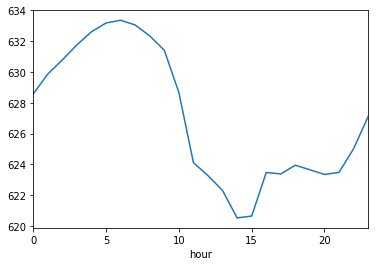

In [14]:
# 時間(hour)を抽出し、hourキーのデータ列としてdataに追加
data['hour'] = [e // 10000 for e in data.time]
d = data.groupby('hour')
d.lidar.mean().plot()
plt.show()

明け方大きい、日中小さい

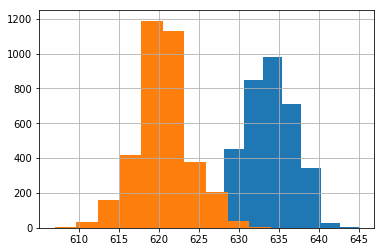

In [16]:
# 6時と14時のグループで頻度分布を表示
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()
plt.show()

それぞれの時間帯で正規分布になる
だんだん横へずれていくような感じ

時間帯を制限する（条件付ける）ことでガウス分布になることがわかった
$$
    P(z \mid t \in 6時台) = \it N \rm (z \mid \mu, \sigma^{2})
$$
$t\in6時台$ はtが6時台に含まれるという意

変数$x$で条件付けられる別の変数$y$の確率分布は
$$
    P(y \mid x)
$$
と表現される。

時間帯ごとにガウス分布を作ってみる
$$
    P(z=a, t=b)
$$
センサ値が$a$, 時刻が$b$が同時に起こる事象に対する確率・同時確率